In [1]:
# Basic Import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
raw = pd.read_csv(os.getcwd()+'\\data\\StudentsPerformance.csv')
raw.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#FIRST MAKEING math score as output and other cols as features for making our X and Y variables

In [3]:
X = raw.drop(columns='math score')
Y = raw['math score']

In [4]:
X.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
Y.head(5)

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

## IMPORTANT

### Create column transformer with 3 types of transform

In [11]:
for feature in raw.columns:
    if raw[feature].dtype == object:
        print(f'Categories in {feature} Variable are: {raw[feature].unique()}')

Categories in gender Variable are: ['female' 'male']
Categories in race/ethnicity Variable are: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education Variable are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch Variable are: ['standard' 'free/reduced']
Categories in test preparation course Variable are: ['none' 'completed']


In [12]:
# Can be seen that less features and also less categorial Data present, so One hot Encoding can be used, 
# on other hand if many featues and many categorial data -> Target Guided Original Coding

In [5]:
# WIll Create a pipleline. 

In [15]:
num_features = X.select_dtypes(exclude = 'object').columns
num_features

Index(['reading score', 'writing score'], dtype='object')

In [16]:
obj_features = X.select_dtypes(include = 'object').columns
obj_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [10]:
#if we combine these 2 as a pipeline then column transformation will happen
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
# This will combine the above 2 together one after other(1st OHE should happen then StandardScaler) 
from sklearn.compose import ColumnTransformer

In [17]:
OHE_transformer = OneHotEncoder()
num_transformer = StandardScaler()

In [18]:

preprocessor = ColumnTransformer([
    ('OneHoteEncoder',OHE_transformer,obj_features),
    ('StandardScaler',num_transformer,num_features)
])

- One by One both are combined as a pipeline, with 1st OHE(for categorial Data) then S.S. is applied (for Numeric features) 
- **This preprocessor transformer will used to fit and transform any data. This is responsible for transforming the dataset.**

In [19]:
X_transformed = preprocessor.fit_transform(X)

In [20]:
X_transformed

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [22]:
X.shape

(1000, 7)

In [23]:
X_transformed.shape

(1000, 19)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_transformed,Y,test_size=0.2,random_state=42)

In [26]:
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [27]:
# Creating Evaluate Function for giving all the metrices after Model Training

In [29]:
def model_evaluate(true_val, predicted):
    mae = mean_absolute_error(true_val,predicted)
    mse = mean_squared_error(true_val,predicted)
    rmse = np.sqrt(mean_squared_error(true_val,predicted))
    r2_sq = r2_score(true_val, predicted)
    return mae, rmse, r2_sq

In [37]:
# List of all the models to be used:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressore' : RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor(),
    "CatBoosting" : CatBoostRegressor(),
    'Ada Boosting': AdaBoostRegressor()
}

model_list = []
r2_list = []

In [38]:
# Fitting the Models with Training DATA
for i in range(len(list(models))):
    model = list(models.values())[i] # getting the models from the list
    model.fit(x_train,y_train) # fitting each model with training dataset
    
# making predictions at the same time for each 
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    
    # EVALUATING THE MODEL WITH THE ABOVE FUNCTION:
    model_train_mae, model_train_rmse, model_train_r2_sq = model_evaluate(y_train,y_train_predict)
    
    model_test_mae, model_test_rmse, model_test_r2_sq = model_evaluate(y_test,y_test_predict)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Preformance for training Set')
    print(f"- Root Mean Square Error: {model_train_rmse}")
    print(f"- Mean Absolute Error: {model_train_mae}")
    print(f"- R2 Score: {model_train_r2_sq}")
    
    print("------------------------------------")
    
    print('Model Preformance for test Set')
    print(f"- Root Mean Square Error: {model_test_rmse}")
    print(f"- Mean Absolute Error: {model_test_mae}")
    print(f"- R2 Score: {model_test_r2_sq}")
    r2_list.append(model_test_r2_sq)
    print("="*35)
    print('\n')
    

Linear Regression
Model Preformance for training Set
- Root Mean Square Error: 5.323050852720514
- Mean Absolute Error: 4.266711846071957
- R2 Score: 0.8743172040139593
------------------------------------
Model Preformance for test Set
- Root Mean Square Error: 5.393993869732846
- Mean Absolute Error: 4.214763142474852
- R2 Score: 0.8804332983749563


Lasso
Model Preformance for training Set
- Root Mean Square Error: 6.593815587795566
- Mean Absolute Error: 5.206302661246526
- R2 Score: 0.8071462015863456
------------------------------------
Model Preformance for test Set
- Root Mean Square Error: 6.519694535667421
- Mean Absolute Error: 5.157881810347763
- R2 Score: 0.8253197323627852


Ridge
Model Preformance for training Set
- Root Mean Square Error: 5.323324922741654
- Mean Absolute Error: 4.264987823725982
- R2 Score: 0.8743042615212909
------------------------------------
Model Preformance for test Set
- Root Mean Square Error: 5.390387016935638
- Mean Absolute Error: 4.21110068

128:	learn: 5.1087287	total: 302ms	remaining: 2.04s
129:	learn: 5.1040759	total: 305ms	remaining: 2.04s
130:	learn: 5.1003176	total: 307ms	remaining: 2.04s
131:	learn: 5.0958142	total: 309ms	remaining: 2.03s
132:	learn: 5.0921469	total: 312ms	remaining: 2.03s
133:	learn: 5.0852583	total: 314ms	remaining: 2.03s
134:	learn: 5.0792194	total: 317ms	remaining: 2.03s
135:	learn: 5.0764768	total: 319ms	remaining: 2.03s
136:	learn: 5.0721339	total: 322ms	remaining: 2.03s
137:	learn: 5.0670316	total: 324ms	remaining: 2.03s
138:	learn: 5.0613583	total: 327ms	remaining: 2.02s
139:	learn: 5.0567591	total: 330ms	remaining: 2.02s
140:	learn: 5.0502540	total: 332ms	remaining: 2.02s
141:	learn: 5.0483765	total: 333ms	remaining: 2.01s
142:	learn: 5.0426038	total: 336ms	remaining: 2.01s
143:	learn: 5.0374773	total: 338ms	remaining: 2.01s
144:	learn: 5.0323049	total: 341ms	remaining: 2.01s
145:	learn: 5.0259762	total: 343ms	remaining: 2.01s
146:	learn: 5.0195245	total: 346ms	remaining: 2.01s
147:	learn: 

345:	learn: 4.3082208	total: 786ms	remaining: 1.49s
346:	learn: 4.3058909	total: 789ms	remaining: 1.48s
347:	learn: 4.3051379	total: 792ms	remaining: 1.48s
348:	learn: 4.3047872	total: 794ms	remaining: 1.48s
349:	learn: 4.3035013	total: 797ms	remaining: 1.48s
350:	learn: 4.3029381	total: 799ms	remaining: 1.48s
351:	learn: 4.2995485	total: 801ms	remaining: 1.47s
352:	learn: 4.2947684	total: 804ms	remaining: 1.47s
353:	learn: 4.2945815	total: 806ms	remaining: 1.47s
354:	learn: 4.2925516	total: 808ms	remaining: 1.47s
355:	learn: 4.2886289	total: 810ms	remaining: 1.47s
356:	learn: 4.2878028	total: 813ms	remaining: 1.46s
357:	learn: 4.2845669	total: 815ms	remaining: 1.46s
358:	learn: 4.2789023	total: 818ms	remaining: 1.46s
359:	learn: 4.2769380	total: 820ms	remaining: 1.46s
360:	learn: 4.2734251	total: 823ms	remaining: 1.46s
361:	learn: 4.2697265	total: 825ms	remaining: 1.45s
362:	learn: 4.2655659	total: 827ms	remaining: 1.45s
363:	learn: 4.2621172	total: 829ms	remaining: 1.45s
364:	learn: 

560:	learn: 3.8057335	total: 1.29s	remaining: 1.01s
561:	learn: 3.8033701	total: 1.3s	remaining: 1.01s
562:	learn: 3.8032152	total: 1.3s	remaining: 1.01s
563:	learn: 3.8013097	total: 1.3s	remaining: 1.01s
564:	learn: 3.8000038	total: 1.3s	remaining: 1s
565:	learn: 3.7980261	total: 1.31s	remaining: 1s
566:	learn: 3.7947458	total: 1.31s	remaining: 999ms
567:	learn: 3.7943120	total: 1.31s	remaining: 996ms
568:	learn: 3.7922059	total: 1.31s	remaining: 993ms
569:	learn: 3.7889911	total: 1.31s	remaining: 991ms
570:	learn: 3.7873916	total: 1.31s	remaining: 988ms
571:	learn: 3.7826445	total: 1.32s	remaining: 986ms
572:	learn: 3.7817003	total: 1.32s	remaining: 983ms
573:	learn: 3.7800454	total: 1.32s	remaining: 980ms
574:	learn: 3.7754626	total: 1.32s	remaining: 978ms
575:	learn: 3.7737119	total: 1.32s	remaining: 976ms
576:	learn: 3.7724158	total: 1.34s	remaining: 980ms
577:	learn: 3.7701709	total: 1.34s	remaining: 981ms
578:	learn: 3.7651665	total: 1.35s	remaining: 979ms
579:	learn: 3.7639761	

720:	learn: 3.4888918	total: 1.64s	remaining: 635ms
721:	learn: 3.4868691	total: 1.64s	remaining: 633ms
722:	learn: 3.4863036	total: 1.65s	remaining: 631ms
723:	learn: 3.4860359	total: 1.65s	remaining: 628ms
724:	learn: 3.4826690	total: 1.65s	remaining: 626ms
725:	learn: 3.4782055	total: 1.65s	remaining: 623ms
726:	learn: 3.4743923	total: 1.65s	remaining: 621ms
727:	learn: 3.4722682	total: 1.66s	remaining: 619ms
728:	learn: 3.4712092	total: 1.66s	remaining: 616ms
729:	learn: 3.4700500	total: 1.66s	remaining: 614ms
730:	learn: 3.4690787	total: 1.66s	remaining: 611ms
731:	learn: 3.4686433	total: 1.66s	remaining: 609ms
732:	learn: 3.4681348	total: 1.66s	remaining: 606ms
733:	learn: 3.4678202	total: 1.67s	remaining: 604ms
734:	learn: 3.4657762	total: 1.67s	remaining: 602ms
735:	learn: 3.4630376	total: 1.67s	remaining: 600ms
736:	learn: 3.4596564	total: 1.67s	remaining: 598ms
737:	learn: 3.4572751	total: 1.68s	remaining: 595ms
738:	learn: 3.4555230	total: 1.68s	remaining: 593ms
739:	learn: 

919:	learn: 3.1581943	total: 1.98s	remaining: 172ms
920:	learn: 3.1570866	total: 1.98s	remaining: 170ms
921:	learn: 3.1533542	total: 1.98s	remaining: 168ms
922:	learn: 3.1532613	total: 1.99s	remaining: 166ms
923:	learn: 3.1531685	total: 1.99s	remaining: 163ms
924:	learn: 3.1520804	total: 1.99s	remaining: 161ms
925:	learn: 3.1516351	total: 1.99s	remaining: 159ms
926:	learn: 3.1477627	total: 1.99s	remaining: 157ms
927:	learn: 3.1471723	total: 1.99s	remaining: 155ms
928:	learn: 3.1462541	total: 1.99s	remaining: 152ms
929:	learn: 3.1448698	total: 2s	remaining: 150ms
930:	learn: 3.1434662	total: 2s	remaining: 148ms
931:	learn: 3.1419196	total: 2s	remaining: 146ms
932:	learn: 3.1410541	total: 2s	remaining: 144ms
933:	learn: 3.1393904	total: 2s	remaining: 142ms
934:	learn: 3.1390253	total: 2s	remaining: 139ms
935:	learn: 3.1378242	total: 2.01s	remaining: 137ms
936:	learn: 3.1356205	total: 2.01s	remaining: 135ms
937:	learn: 3.1344318	total: 2.01s	remaining: 133ms
938:	learn: 3.1327657	total: 2

In [39]:
# seeing which model has best R2 score and choosing that
pd.DataFrame(list(zip(model_list, r2_list)),columns = ['Model Name', 'R2_Score']).sort_values(by = ['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressore,0.852440
7,CatBoosting,0.851632
8,Ada Boosting,0.846945
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.772765


# LINEAR REGRESSION

In [41]:
lin_reg_model = LinearRegression(fit_intercept=True)
lin_reg_model.fit(x_train,y_train)
y_predict = lin_reg_model.predict(x_test)
score = r2_score(y_test,y_predict)*100
print(f'Accuracy of the model is {score} %')

Accuracy of the model is 88.04332983749563 %


In [42]:
# PLOTTING y_test and y_predict

Text(0, 0.5, 'Predicted')

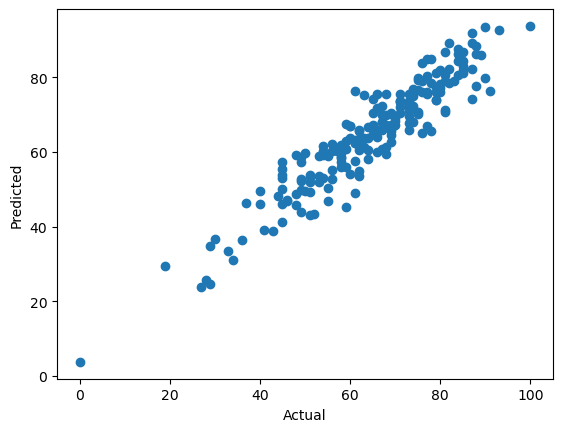

In [43]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

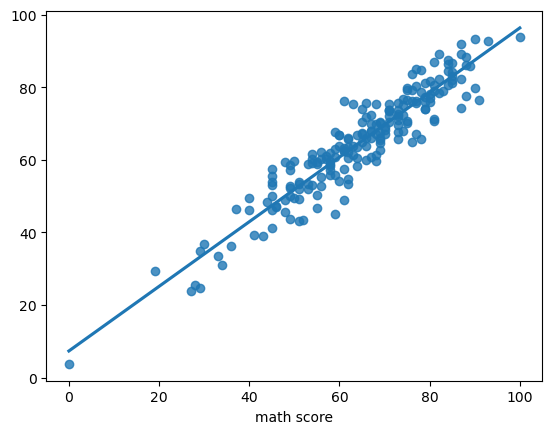

In [50]:
sns.regplot(x = y_test, y = y_predict, ci = None)

In [52]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_predict, 'Difference b/w 2': y_test - y_predict})
pred_df.head(5)

,Actual Value,Predicted Value,Difference b/w 2
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
